In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#加载数据
np.random.seed(seed=1)
X_n=16 
X=5+25*np.random.rand(X_n)
X_min = 0
X_max = 30
Prm_c=[170,108,0.2] 
T=Prm_c[0]-Prm_c[1]*np.exp(-Prm_c[2]*X)+4*np.random.randn(X_n)
print(np.round(X,2))
print(np.round(T,2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


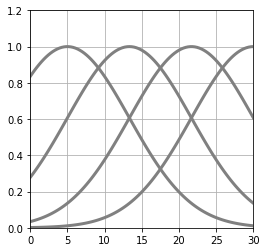

In [3]:
#高斯函数
def gauss(x,mu,s):
    return np.exp(-(x - mu)**2 / (2* s**2))

#主处理
M = 4
plt.figure(figsize=(4,4))
mu = np.linspace(5,30,M)
s = mu[1] - mu[0]
xb = np.linspace(X_min,X_max,100)
for j in range(M):
    y = gauss(xb,mu[j],s)
    plt.plot(xb,y,color='gray',linewidth=3)
plt.grid(True)
plt.xlim(X_min,X_max)
plt.ylim(0,1.2)
plt.show()

In [4]:
#线性基底函数模型
def gauss_func(w,x):
    m = len(w) - 1
    mu = np.linspace(5,30,m)
    s = mu[1] -mu[0]
    y = np.zeros_like(x)    #创建与x大小相同，元素为0的矩阵y
    for j in range(m):
        y = y + w[j]*gauss(x,mu[j],s)
    y = y +w[m]
    return y

In [5]:
#线性基底函数模型MSE
def mse_gauss_func(x,t,w):
    y = gauss_func(w,x)
    mse = np.mean((y-t)**2)
    return  mse

#线性基地函数模型 严密解
def fit_gauss_func(x,t,m):
    mu = np.linspace(5,30,m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    phi = np.ones((n,m+1))
    for j in range(m):
        phi[:,j] = gauss(x,mu[j],s)
    phi_T = np.transpose(phi)
    
    b = np.linalg.inv(phi_T.dot(phi))
    c = b.dot(phi_T)
    w = c.dot(t)
    return w
    

W = [29.4 75.7  2.9 98.3 54.9]
SD = 3.98 cm


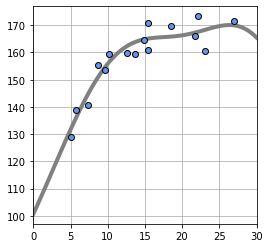

In [6]:
#显示高斯基底函数
def show_gauss_func(w):
    xb = np.linspace(X_min,X_max,100)
    y = gauss_func(w,xb)
    plt.plot(xb,y,c=[.5, .5, .5],lw=4)
    
#主处理
plt.figure(figsize=(4,4))
M = 4
W = fit_gauss_func(X,T,M)
show_gauss_func(W)
plt.plot(X,T,marker='o',linestyle='None',color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
mse = mse_gauss_func(X,T,W)
print('W = '+str(np.round(W,1)))
print("SD = {0:.2f} cm".format(np.sqrt(mse)))
plt.show()

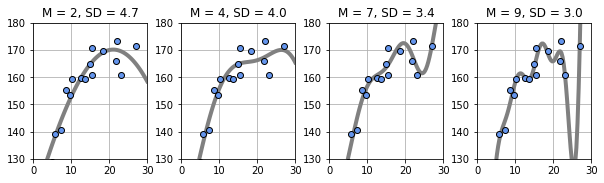

In [7]:
#过拟合问题
plt.figure(figsize=(10,2.5))
plt.subplots_adjust(wspace=0.3)
M = [2,4,7,9]
for i in range(len(M)):
        plt.subplot(1,len(M),i+1)
        W = fit_gauss_func(X,T,M[i])
        show_gauss_func(W)
        plt.plot(X,T,marker='o',linestyle='None',color='cornflowerblue',markeredgecolor='black')
        plt.xlim(X_min,X_max)
        plt.grid(True)
        plt.ylim(130,180)
        mse = mse_gauss_func(X,T,W)
        
        plt.title("M = {0:d}, SD = {1:.1f}".format(M[i],np.sqrt(mse)))
plt.show()

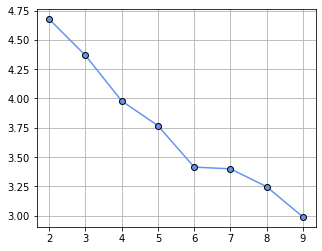

In [8]:
#随着M的增大，SD的确在单调减小
plt.figure(figsize=(5,4))
M = range(2,10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X,T,M[i])
    
    mse2[i] = np.sqrt(mse_gauss_func(X,T,W))
plt.plot(M,mse2,marker='o',color='cornflowerblue',markeredgecolor='black')
plt.grid(True)
plt.show()

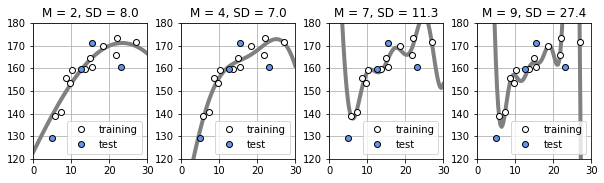

In [9]:
#训练数据与测试数据
X_test = X[:int(X_n/4)]
T_test = T[:int(X_n/4)]
X_train = X[int(X_n/4):]
T_train = T[int(X_n/4):]

#主处理
plt.figure(figsize=(10,2.5))
plt.subplots_adjust(wspace = 0.3)
M = [2,4,7,9]
for i in range(len(M)):
    plt.subplot(1,len(M),i+1)
    W = fit_gauss_func(X_train,T_train,M[i])
    show_gauss_func(W)
    plt.plot(X_train,T_train,marker='o',linestyle='None',color='white',markeredgecolor='black',label='training')
    plt.plot(X_test,T_test,marker='o',linestyle='None',color='cornflowerblue',markeredgecolor='black',label='test')
    plt.legend(loc='lower right',fontsize=10,numpoints=1)
    plt.xlim(X_min,X_max)
    plt.ylim(120,180)
    plt.grid(True)
    mse = mse_gauss_func(X_test,T_test,W)
    plt.title("M = {0:d}, SD = {1:.1f}".format(M[i],np.sqrt(mse)))
plt.show()

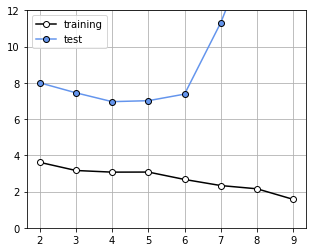

In [10]:
#为了定量看到变化趋势，我们将M从2递增到9,并绘制图形，展示训练数据与测试数据的误差SD
plt.figure(figsize=(5,4))
M = range(2,10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X_train,T_train,M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train,T_train,W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test,T_test,W))
plt.plot(M,mse_train,marker='o',linestyle='-',markerfacecolor='white',markeredgecolor='black',color='black',label='training')
plt.plot(M,mse_test,marker='o',linestyle='-',color='cornflowerblue',markeredgecolor='black',label='test')
plt.legend(loc='upper left',fontsize=10)
plt.ylim(0,12)
plt.grid(True)
plt.show()


In [11]:
#K折交叉验证
def kfold_gauss_func(x,t,m,k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0,k):
        x_train = x[np.fmod(range(n),k) != i]
        t_train = t[np.fmod(range(n),k) != i]
        x_test = x[np.fmod(range(n),k) == i]
        t_test = t[np.fmod(range(n),k) == i]
        wm = fit_gauss_func(x_train,t_train,m)
        mse_train[i] = mse_gauss_func(x_train,t_train,wm)
        mse_test[i] = mse_gauss_func(x_test,t_test,wm)
    return mse_train,mse_test

In [12]:
#设基底数M=4,分割数K=4
M=4
K=4
kfold_gauss_func(X,T,M,K)
#结果中的上面一行是每种数据方法中的训练数据的方差
#下面一行是测试数据的均方误差

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782018,  18.30921743,  47.52459642]))

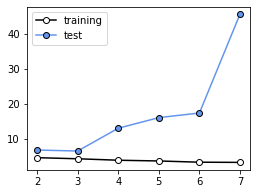

In [13]:
#使用kfold_gauss_func计算当分割数为最大值K=16时，M为从2到7时误差的平均值
M = range(2,8)
K = 16
Cv_Gauss_train = np.zeros((K,len(M)))
Cv_Gauss_test = np.zeros((K,len(M)))
for i in range(0,len(M)):
    Cv_Gauss_train[:,i],Cv_Gauss_test[:,i] = kfold_gauss_func(X,T,M[i],K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train,axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test,axis=0))

plt.figure(figsize = (4,3))
plt.plot(M,mean_Gauss_train,marker='o',linestyle='-',color='k',markerfacecolor='w',label='training')
plt.plot(M,mean_Gauss_test,marker='o',linestyle='-',color='cornflowerblue',markeredgecolor='black',label='test')
plt.legend(loc='upper left',fontsize=10)
plt.show()

SD = 4.37 cm


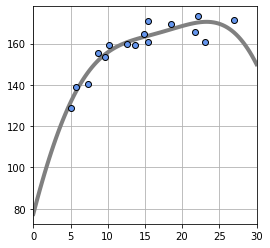

In [14]:
#owing to the number M = 3 is the best optional between 2 and 7,in this case,then we should find the best optional w
M =3
plt.figure(figsize=(4,4))
W = fit_gauss_func(X,T,M)
show_gauss_func(W)
plt.plot(X,T,marker='o',linestyle='None',color='cornflowerblue',markeredgecolor='black')
plt.xlim([X_min,X_max])
plt.grid(True)
mse = mse_gauss_func(X,T,W)
print("SD = {0:.2f} cm".format(np.sqrt(mse)))
plt.show()

In [18]:
#模型A
def model_A(x,w):
    y = w[0]-w[1]*np.exp(-w[2]*x)
    return y

#显示模型A
def show_model_A(w):
    xb = np.linspace(X_min,X_max,100)
    y = model_A(xb,w)
    plt.plot(xb,y,c=[.5,.5,.5],lw=4)
    
#模型A的MSE
def mse_model_A(w,x,t):
    y = model_A(x,w)
    mse = np.mean((y-t)**2)
    return mse

In [19]:
from scipy.optimize import minimize

#模型A参数的最优化
#参数初始值w_init，输入数据x和目标数据t
def fit_model_A(w_init,x,t):
    #minimize的第一个参数是要最小化的目标函数，第二个参数是w的初始值，第三个参数是目标函数mse_model_A(w,x,t)的
    #最优参数之外的其他参数，最后指定可选参数method为powell，以通过不使用梯度的鲍威尔算法进行最优化
    res1 = minimize(mse_model_A,w_init,args=(x,t),method="powell")
    return res1.x

w0 = 169.0,w1 = 113.7, w2 = 0.2
SD = 3.86 cm


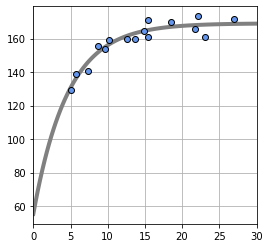

In [21]:
#主处理
plt.figure(figsize=(4,4))
W_init = [100,0,0]
W = fit_model_A(W_init,X,T)
print("w0 = {0:.1f},w1 = {1:.1f}, w2 = {2:.1f}".format(W[0],W[1],W[2]))
show_model_A(W)
plt.plot(X,T,marker='o',linestyle='None',color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
mse = mse_model_A(W,X,T)
print("SD = {0:.2f} cm".format(np.sqrt(mse)))
plt.show()

Gauss(M = 3) SD = 6.51 cm
Model A SD = 4.72 cm


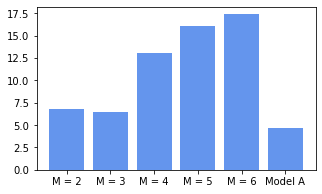

In [25]:
#留一交叉验证 model_A
def kfold_model_A(x,t,k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0,k):
        x_train = x[np.fmod(range(n),k)!=i]
        t_train = t[np.fmod(range(n),k)!=i]
        x_test = x[np.fmod(range(n),k)==i]
        t_test = t[np.fmod(range(n),k)==i]
        wm = fit_model_A(np.array([169,113,0.2]),x_train,t_train)
        mse_train[i] = mse_model_A(wm,x_train,t_train)
        mse_test[i] = mse_model_A(wm,x_test,t_test)
    return mse_train,mse_test

#主处理
K = 16
Cv_A_train,Cv_A_test = kfold_model_A(X,T,K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M = 3) SD = {0:.2f} cm".format(mean_Gauss_test[1]))
print("Model A SD = {0:.2f} cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5],mean_A_test)
M = range(6)
label = ["M = 2","M = 3","M = 4","M = 5","M = 6","Model A"]
plt.figure(figsize=(5,3))
plt.bar(M,SD,tick_label=label,align="center",facecolor="cornflowerblue")
plt.show()